In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

In [9]:
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
from nba_api.stats.static.players import find_players_by_full_name

In [14]:
headers = {
    'Host': 'stats.nba.com',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:61.0) Gecko/20100101 Firefox/61.0',
    'Accept': 'application/json, text/plain, */*',
    'Accept-Language': 'en-US,en;q=0.5',
    'Referer': 'https://stats.nba.com/',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
}

In [10]:
kyrie_id = find_players_by_full_name('Kyrie Irving')[0]['id']

In [11]:
seasons = [
    '2011-12',
    '2012-13',
    '2013-14',
    '2014-15',
    '2015-16',
    '2016-17',
    '2017-18',
    '2018-19',
    '2019-20',
]

In [19]:
kyrie_df = ShotChartDetail(season_nullable=seasons[0], team_id=0, player_id=kyrie_id, headers=headers, context_measure_simple='FGA')

In [24]:
kyrie_df.get_data_frames()[1]

,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,FGA,FGM,FG_PCT
0,League Averages,Above the Break 3,Back Court(BC),Back Court Shot,60,1,0.017
1,League Averages,Above the Break 3,Center(C),24+ ft.,5594,1858,0.332
2,League Averages,Above the Break 3,Left Side Center(LC),24+ ft.,10272,3496,0.340
3,League Averages,Above the Break 3,Right Side Center(RC),24+ ft.,10361,3639,0.351
4,League Averages,Backcourt,Back Court(BC),Back Court Shot,304,10,0.033
5,League Averages,In The Paint (Non-RA),Center(C),8-16 ft.,5041,1981,0.393
6,League Averages,In The Paint (Non-RA),Center(C),Less Than 8 ft.,15642,5855,0.374
7,League Averages,In The Paint (Non-RA),Left Side(L),8-16 ft.,1568,629,0.401
8,League Averages,In The Paint (Non-RA),Right Side(R),8-16 ft.,1692,654,0.387
9,League Averages,Left Corner 3,Left Side(L),24+ ft.,4998,1880,0.376


In [25]:
kyrie_df_2 = ShotChartDetail(season_nullable=seasons[1], team_id=0, player_id=kyrie_id, headers=headers, context_measure_simple='FGA')

In [31]:
data_frame = kyrie_df.get_data_frames()[1]

In [33]:
data_frame.FGA = data_frame.FGA + kyrie_df_2.get_data_frames()[1].FGA

In [34]:
data_frame

,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,FGA,FGM,FG_PCT
0,League Averages,Above the Break 3,Back Court(BC),Back Court Shot,126,1,0.017
1,League Averages,Above the Break 3,Center(C),24+ ft.,13239,1858,0.332
2,League Averages,Above the Break 3,Left Side Center(LC),24+ ft.,23737,3496,0.340
3,League Averages,Above the Break 3,Right Side Center(RC),24+ ft.,24284,3639,0.351
4,League Averages,Backcourt,Back Court(BC),Back Court Shot,724,10,0.033
5,League Averages,In The Paint (Non-RA),Center(C),8-16 ft.,11504,1981,0.393
6,League Averages,In The Paint (Non-RA),Center(C),Less Than 8 ft.,34700,5855,0.374
7,League Averages,In The Paint (Non-RA),Left Side(L),8-16 ft.,3368,629,0.401
8,League Averages,In The Paint (Non-RA),Right Side(R),8-16 ft.,3683,654,0.387
9,League Averages,Left Corner 3,Left Side(L),24+ ft.,12054,1880,0.376


In [28]:
kyrie_df.get_data_frames()[1].FGA + kyrie_df_2.get_data_frames()[1].FGA

0        126
1      13239
2      23737
3      24284
4        724
5      11504
6      34700
7       3368
8       3683
9      12054
10      3498
11     13943
12     15624
13     13151
14     15403
15     17535
16     12188
17     14524
18    118234
19     11265
Name: FGA, dtype: int64

In [35]:
first_kyrie = kyrie_df.get_data_frames()[0]
second_kyrie = kyrie_df_2.get_data_frames()[0]

In [36]:
pd.concat([first_kyrie, second_kyrie])

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021100009,42,202681,Kyrie Irving,1610612739,Cleveland Cavaliers,1,8,5,...,Center(C),Less Than 8 ft.,6,39,55,1,0,20111226,CLE,TOR
1,Shot Chart Detail,0021100009,53,202681,Kyrie Irving,1610612739,Cleveland Cavaliers,1,7,17,...,Center(C),Less Than 8 ft.,0,9,1,1,0,20111226,CLE,TOR
2,Shot Chart Detail,0021100009,194,202681,Kyrie Irving,1610612739,Cleveland Cavaliers,2,5,31,...,Center(C),24+ ft.,24,-40,241,1,0,20111226,CLE,TOR
3,Shot Chart Detail,0021100009,210,202681,Kyrie Irving,1610612739,Cleveland Cavaliers,2,3,45,...,Center(C),Less Than 8 ft.,5,29,42,1,1,20111226,CLE,TOR
4,Shot Chart Detail,0021100009,254,202681,Kyrie Irving,1610612739,Cleveland Cavaliers,2,0,0,...,Center(C),Less Than 8 ft.,2,21,9,1,0,20111226,CLE,TOR
5,Shot Chart Detail,0021100009,263,202681,Kyrie Irving,1610612739,Cleveland Cavaliers,3,11,23,...,Right Side(R),24+ ft.,23,233,25,1,0,20111226,CLE,TOR
6,Shot Chart Detail,0021100009,289,202681,Kyrie Irving,1610612739,Cleveland Cavaliers,3,9,14,...,Center(C),16-24 ft.,17,-21,170,1,0,20111226,CLE,TOR
7,Shot Chart Detail,0021100009,313,202681,Kyrie Irving,1610612739,Cleveland Cavaliers,3,5,44,...,Right Side Center(RC),24+ ft.,24,138,205,1,0,20111226,CLE,TOR
8,Shot Chart Detail,0021100009,464,202681,Kyrie Irving,1610612739,Cleveland Cavaliers,4,5,15,...,Left Side Center(LC),16-24 ft.,21,-155,148,1,0,20111226,CLE,TOR
9,Shot Chart Detail,0021100009,480,202681,Kyrie Irving,1610612739,Cleveland Cavaliers,4,2,24,...,Center(C),Less Than 8 ft.,2,-2,26,1,0,20111226,CLE,TOR


In [38]:
kyrie_df.get_data_frames()[1]

,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,FGA,FGM,FG_PCT
0,League Averages,Above the Break 3,Back Court(BC),Back Court Shot,60,1,0.017
1,League Averages,Above the Break 3,Center(C),24+ ft.,5594,1858,0.332
2,League Averages,Above the Break 3,Left Side Center(LC),24+ ft.,10272,3496,0.340
3,League Averages,Above the Break 3,Right Side Center(RC),24+ ft.,10361,3639,0.351
4,League Averages,Backcourt,Back Court(BC),Back Court Shot,304,10,0.033
5,League Averages,In The Paint (Non-RA),Center(C),8-16 ft.,5041,1981,0.393
6,League Averages,In The Paint (Non-RA),Center(C),Less Than 8 ft.,15642,5855,0.374
7,League Averages,In The Paint (Non-RA),Left Side(L),8-16 ft.,1568,629,0.401
8,League Averages,In The Paint (Non-RA),Right Side(R),8-16 ft.,1692,654,0.387
9,League Averages,Left Corner 3,Left Side(L),24+ ft.,4998,1880,0.376


In [40]:
final_df = None
league_avg_df = None

for season in seasons:
    if final_df is None:
        data = ShotChartDetail(season_nullable=season, team_id=0, player_id=kyrie_id, headers=headers, context_measure_simple='FGA')
        final_df = data.get_data_frames()[0]
        league_avg_df = data.get_data_frames()[1]
    else:
        data = ShotChartDetail(season_nullable=season, team_id=0, player_id=kyrie_id, headers=headers, context_measure_simple='FGA')
        curr_df = data.get_data_frames()[0]
        l_avg = data.get_data_frames()[1]
        final_df = pd.concat([final_df, curr_df])
        league_avg_df.FGA = league_avg_df.FGA + l_avg.FGA
        league_avg_df.FGM = league_avg_df.FGM + l_avg.FGM
    time.sleep(1)

league_avg_df.FG_PCT = league_avg_df.FGM / league_avg_df.FGA

# Drawing

In [42]:
from matplotlib.patches import Circle, Rectangle, Arc
import random

# Amazing function by Bradley Fay for plotting the nba court
# source: https://github.com/bradleyfay/py-Goldsberry/blob/master/docs/Visualizing%20NBA%20Shots%20with%20py-Goldsberry.ipynb
def draw_court(ax=None, color='black', lw=2, background_color="#EBEBE8", outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False, zorder=0)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False, zorder=0)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False, zorder=0)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed', zorder=0)
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color, zorder=0)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 138, linewidth=lw,
                               color=color, zorder=0)
    corner_three_b = Rectangle((220, -47.5), 0, 138, linewidth=lw, color=color, zorder=0)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color, zorder=0)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color, zorder=0)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color, zorder=0)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]
    
    # Draw the half court line, baseline and side out bound lines
    outer_lines = Rectangle((-249, -48), 498, 469, linewidth=lw,
                            color=color, fill=None)
    court_elements.append(outer_lines)
    outer_lines_fill = Rectangle((-249, -48), 498, 470, linewidth=lw,
                            color=background_color, fill=True, zorder=-2)
    court_elements.append(outer_lines_fill)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [43]:
from collections import Counter
import operator
def create_bins(data_frame, bin_number_x = 30, bin_number_y=300 / (500.0 / 30.0), league_average = None,
                width = 500, height = 300, norm_x = 250, norm_y = 48):
    """
    Method which creates bins the dataset into squared grid. This is used so that plot looks nicer than the raw
    locations plot. Along with binning the data, the percentages per zones and for each bin are calculated here
    and added to the copy of data_frame object so they can be used for plotting later.

    :return: Returns the copied  data_frame pandas DataFrame object with additional info about the shots.
    """
    # Binned x and y coordinates
    x_bins, y_bins = [], []
    # Copying the dataset to add more data
    copied_df = data_frame.copy()
    # Keys are basically x_bin and y_bin
    keys = []
    # Counter of shots and shots made per locations
    location_counts, location_made = Counter(), Counter()
    # be found

    # Size of elements in bin, they should be the same
    bin_size_x = float(width) / float(bin_number_x)
    bin_size_y = float(height) / float(bin_number_y)
    # List for locations of shots
    locations_annotated = []
    # Counter of shots and shots made per zone
    zones_counts, zones_made = Counter(), Counter()

    # Maximum size of an element in one bin
    max_size = int((int(bin_size_x) - 1) * (int(bin_size_y) - 1)) * 9

    # Keys that are in restricted area will be stored here, this will be used for finding maximum number of shots
    restricted_area_keys = []

    # Dictionary which will determine the color of marker in bin
    percentage_color_dict = {}

    for i in range(len(data_frame)):

        # Row from data frame
        row = data_frame.iloc[i]

        x_shot_orig, y_shot_orig = row.LOC_X, row.LOC_Y

        # Normalize
        x_shot = x_shot_orig + norm_x  # to put minimum to zero
        y_shot = y_shot_orig + norm_y  # to put minimum to zero

        # bin_index = (x_shot / w) * bin_size
        curr_x_bin = 0 if x_shot == 0 else int((x_shot / float(width)) * bin_number_x)
        curr_y_bin = 0 if y_shot == 0 else int((y_shot / float(height)) * bin_number_y)

        # Key for dicts
        key = (curr_x_bin, curr_y_bin)

        if row.SHOT_ZONE_BASIC == "Restricted Area":
            restricted_area_keys.append(key)

        # Counting number of shots made and shots shot
        keys.append(key)
        location_counts[key] += 1
        location_made[key] += row.SHOT_MADE_FLAG

        basic_shot_zone, shot_zone_area = row.SHOT_ZONE_BASIC, row.SHOT_ZONE_AREA
        zone_dist = row.SHOT_ZONE_RANGE

        area_code = shot_zone_area.split("(")[1].split(")")[0]
        if "3" in basic_shot_zone:
            locations_annotated.append("3" + area_code)
        elif "Paint" in basic_shot_zone:
            locations_annotated.append("P" + area_code + zone_dist[0])
        elif "Mid" in basic_shot_zone:
            locations_annotated.append("M" + area_code + zone_dist[0])
        else:
            locations_annotated.append("R" + area_code)

        # Creating key for zones
        zone_key = (basic_shot_zone, shot_zone_area, zone_dist)

        # Counting the occurences based on both bin_key and zone_key, because of that we have dict in dict
        if key in percentage_color_dict:
            if zone_key in percentage_color_dict[key]:
                percentage_color_dict[key][zone_key] = percentage_color_dict[key][zone_key] + 1
            else:
                percentage_color_dict[key][zone_key] = 1
        else:
            percentage_color_dict[key] = {}
            percentage_color_dict[key][zone_key] = 1

        zones_counts[zone_key] += 1

        if row.SHOT_MADE_FLAG:
            zones_made[zone_key] += 1

    shot_locations_percentage = []  # percentage in given bin
    shot_locations_counts = []
    raw_counts = []
    # List which contains comparison for each shot with league average in that zone
    shot_comparison = []
    # List which contains comparison of player's shooting in zone vs league average
    per_zone_comparison = []
    per_zone_percentage = []

    # Finding the maximal number of shots from data
    non_ra = []
    for key in location_counts:
        if key not in restricted_area_keys:
            if location_counts[key] not in non_ra:
                non_ra.append(location_counts[key])

    sorted_non_ra = sorted(non_ra)
    max_out_of_restricted = float(sorted_non_ra[-1])

    for j in range(len(data_frame)):
        key = keys[j]
        x_bin, y_bin = key[0], key[1]
        shot_percent = float(location_made[key]) / location_counts[key]
        # shot_percent = np.clip(shot_percent, 0.3, 0.7)
        shot_locations_percentage.append(shot_percent * 100)
        if league_average is not None:
            # Getting info about zone
            # We are getting that info from
            per_zone_counter_from_percentage_color_dict = percentage_color_dict[key]
            zone_key = max(per_zone_counter_from_percentage_color_dict.items(),
                           key=operator.itemgetter(1))[0]

            shot_zone_basic = zone_key[0]
            shot_zone_area = zone_key[1]
            distance = zone_key[2]

            # Calculating the percentage in current zone
            zone_percent = 0.0 if zone_key not in zones_made else float(zones_made[zone_key]) / \
                                                                  float(zones_counts[zone_key])

            # Retrieving league average percentage for current zone
            avg_percentage = league_average.loc[
                (league_average.SHOT_ZONE_BASIC == shot_zone_basic) &
                (league_average.SHOT_ZONE_AREA == shot_zone_area) &
                (league_average.SHOT_ZONE_RANGE == distance)].FG_PCT.iloc[
                0
            ]
            # Comparison of league average and each shot
            shot_comparison.append(np.clip((shot_percent - avg_percentage) * 100, -10, 10))
            # Comparison of zone and league average
            per_zone_comparison.append(np.clip((zone_percent - avg_percentage) * 100, -10, 10))
            # Percentage of shot in current zone, kinda inaccurate info, good for some other type of plot
            per_zone_percentage.append(np.clip(zone_percent * 100, 35, 65))

        # Calculating value to which the markers will be scaled later on
        # The data in restricted is scaled to maximum out of restricted area, because players usually have a lot
        # more shots in restricted area
        value_to_scale = max_out_of_restricted if location_counts[key] > max_out_of_restricted else \
            location_counts[key]
        # Storing the data into a list
        shot_locations_counts.append((float(value_to_scale) / max_out_of_restricted) * max_size)

        # Count of shots per bin
        raw_counts.append(location_counts[key])

        # Middle of current and next bin is where we will place the marker in real coordinates
        unbinned_x = ((x_bin * float(width)) / bin_number_x + (
                (x_bin + 1) * float(width)) / bin_number_x) / 2 - norm_x
        unbinned_y = ((y_bin * float(height)) / bin_number_y + (
                (y_bin + 1) * float(height)) / bin_number_y) / 2 - norm_y

        # Adding binned locations
        x_bins.append(unbinned_x)
        y_bins.append(unbinned_y)

    # Binned locations
    copied_df['BIN_LOC_X'] = x_bins
    copied_df['BIN_LOC_Y'] = y_bins
    # Percentage comparison with league averages
    if league_average is not None:
        # Comparison of each shot with league average for that zone
        copied_df['PCT_LEAGUE_AVG_COMPARISON'] = shot_comparison
        # Comparison of each zone with league average for that zone
        copied_df['PCT_LEAGUE_COMPARISON_ZONE'] = per_zone_comparison
    # Percentage of shots for that location
    copied_df['LOC_PERCENTAGE'] = shot_locations_percentage
    # Percentage of whole zone (not in comparison with league average)
    copied_df['LOC_ZONE_PERCENTAGE'] = per_zone_percentage
    # Scaled count of shots and count of shots per bin
    copied_df['LOC_COUNTS'] = shot_locations_counts
    copied_df['LOC_RAW_COUNTS'] = raw_counts

    return copied_df

In [115]:
import matplotlib.path as mpath
from matplotlib.colors import colorConverter
def get_smooth_square():
    """
    Creates marker which represents smooth square.

    :return: new matplotlib.path.Path instance
    """
    marker = np.array([[-0.8, 1.0],
                       [-1.0, 0.8],
                       [-1.0, -0.8],
                       [-0.8, -1.0],
                       [0.8, -1.0],
                       [1.0, -0.8],
                       [1.0, 0.8],
                       [0.8, 1.0],
                       [-0.8, 1.0]])

    return mpath.Path(marker, closed=True)

def plot_shotchart(data_frame, title, mode='dark', image_name=None):
    plt.style.use('fivethirtyeight')
    fig, ax = plt.subplots(figsize=(12, 12))
    # colors_dict = {0:'red', 1:'green'}
    cmap = sns.blend_palette(colors=["#4159E1", "#B0E0E6", "#FFFF99","#EF3330", "#AB2020"], as_cmap=True)

    
    # LOC_PERCENTAGE -> total perc
    # PCT_LEAGUE_AVG_COMPARISON -> comparison per bins
    # PCT_LEAGUE_COMPARISON_ZONE -> comparison per zones only
    # LOC_X, LOC_Y -> real locs
    # BIN_LOC_X, BIN_LOC_Y -> binned locations
    marker = get_smooth_square()
    edge_color = colorConverter.to_rgba('black', alpha=.5)
    dropped_dups = data_frame.drop_duplicates(subset=['BIN_LOC_X', 'BIN_LOC_Y'], keep='first')
    dropped_dups = dropped_dups.loc[dropped_dups.LOC_RAW_COUNTS > 5]
    paths = ax.scatter(
        x=dropped_dups.BIN_LOC_X,
        y=dropped_dups.BIN_LOC_Y,
        marker=marker,
        s=dropped_dups.LOC_COUNTS * 2,
        c=dropped_dups.PCT_LEAGUE_COMPARISON_ZONE,
        cmap=cmap,
        edgecolors='black',
    )

    """for i in range(len(cleared_df)):
        if cleared_df.iloc[i].LOCATION_CODE == "3C" or cleared_df.iloc[i].LOCATION_CODE == "RC":
            plt.text(x=cleared_df.iloc[i].LOC_X, y=cleared_df.iloc[i].LOC_Y, s=cleared_df.iloc[i].LOCATION_CODE, color="#E2E2FF")"""

    if mode == 'dark':
        background_color="#363F48"
        font_color="#E8E8FF"
    else:
        background_color="#EBEBE8"
        font_color = "#454545"
    # Frequency
    

    ax.text(x=-240, y=360, s="Less\nFrequent", color=font_color, fontsize=12)
    ax.scatter(x=-218, y=377, s=20 * 1 * 2.5, marker=marker, c=font_color)
    ax.scatter(x=-205, y=377, s=20 * 3 * 2.5, marker=marker, c=font_color)
    ax.scatter(x=-190, y=377, s=20 * 6 * 2.5, marker=marker, c=font_color)
    ax.scatter(x=-171, y=377, s=20 * 9 * 2.5, marker=marker, c=font_color)
    ax.scatter(x=-151, y=377, s=20 * 11 * 2.5, marker=marker, c=font_color)
    ax.text(x=-153, y=360, s="      More\nFrequent", color=font_color, fontsize=12)


    # Efficiency

    ax.text(x=64, y=410, s="Comparison with league average percentage", color=font_color, fontsize=12)
    ax.text(x=95, y=360, s="Below\nAverage", color=font_color, fontsize=12)
    ax.scatter(x=130, y=377, s=550, marker=marker, c="#4159E1", edgecolors='black')
    ax.scatter(x=147, y=377, s=550, marker=marker, c="#B0E0E6", edgecolors='black')
    ax.scatter(x=164, y=377, s=550, marker=marker, c="#FFFF99", edgecolors='black')
    ax.scatter(x=181, y=377, s=550, marker=marker, c="#EF3330", edgecolors='black')
    ax.scatter(x=198, y=377, s=550, marker=marker, c="#AB2020", edgecolors='black')
    ax.text(x=201, y=360, s="   Above\nAverage", color=font_color, fontsize=12)
    
    grouped_by_zone = dropped.groupby(by=['SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE']).mean()

    for index, loc_x in enumerate(grouped_by_zone.BIN_LOC_X):
        loc_y = grouped_by_zone.BIN_LOC_Y[index]
        zone_percentage = grouped_by_zone.LOC_ZONE_PERCENTAGE[index]
        ax.text(x=loc_x, y=loc_y+10, s="{0:.2f}%".format(zone_percentage), ha='center', c='black',
               bbox={'facecolor': '#F3F3A9', 'alpha': 0.75, 'edgecolor': 'black'})
    # Changing court color
    #ax.set_facecolor('#363F48')

    #plt.xticks(np.arange(-250, 251, 20))
    #plt.yticks(np.arange(-50, 490, 20))
    # Removing ticks
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.grid(False)

    # Title
    plt.title(title, size=20)
    
    # Drawing court
    draw_court(ax=ax,outer_lines=True, lw=3, background_color=background_color)
    ax.set_xlim(-252,252)
    ax.set_ylim(-65,423)

    if image_name:
        fig.savefig(image_name, bbox_inches='tight')
    return dropped_dups

In [57]:
final_df.LOC_X = -final_df.LOC_X

In [58]:
kyrie_binned = create_bins(data_frame=final_df, league_average=league_avg_df)

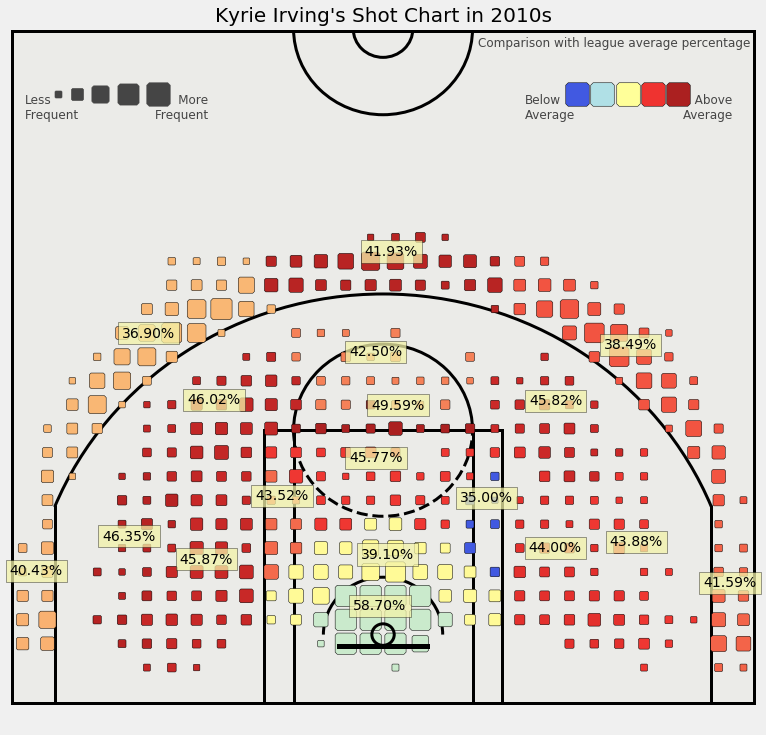

In [116]:
dropped = plot_shotchart(data_frame=kyrie_binned, title="Kyrie Irving's Shot Chart in 2010s", mode='light')

In [65]:
dropped.LOC_PERCENTAGE

0      33.333333
1      72.900763
2      55.555556
3      46.428571
4      53.636364
         ...    
354    33.333333
523    50.000000
723    28.571429
738    44.444444
508    54.545455
Name: LOC_PERCENTAGE, Length: 383, dtype: float64

In [67]:
dropped.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM', 'BIN_LOC_X', 'BIN_LOC_Y', 'PCT_LEAGUE_AVG_COMPARISON',
       'PCT_LEAGUE_COMPARISON_ZONE', 'LOC_PERCENTAGE', 'LOC_ZONE_PERCENTAGE',
       'LOC_COUNTS', 'LOC_RAW_COUNTS'],
      dtype='object')

In [71]:
grouped_by_zone = dropped.groupby(by=['SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE']).mean()

In [79]:
grouped_by_zone.LOC_ZONE_PERCENTAGE

SHOT_ZONE_BASIC        SHOT_ZONE_AREA         SHOT_ZONE_RANGE
Above the Break 3      Center(C)              24+ ft.            41.928496
                       Left Side Center(LC)   24+ ft.            38.488372
                       Right Side Center(RC)  24+ ft.            36.897868
In The Paint (Non-RA)  Center(C)              8-16 ft.           45.769858
                                              Less Than 8 ft.    39.101524
                       Left Side(L)           8-16 ft.           35.000000
                       Right Side(R)          8-16 ft.           43.521581
Left Corner 3          Left Side(L)           24+ ft.            41.592920
Mid-Range              Center(C)              16-24 ft.          42.500000
                                              8-16 ft.           49.586535
                       Left Side Center(LC)   16-24 ft.          45.818182
                       Left Side(L)           16-24 ft.          43.883627
                                      

In [76]:
for index, loc_x in enumerate(grouped_by_zone.BIN_LOC_X):
    loc_y = grouped_by_zone.BIN_LOC_Y[index]
    zone_percentage = grouped_by_zone.LOC_ZONE_PERCENTAGE[index]
    

5.666666666666672
165.952380952381
-157.43243243243242
-4.761904761904759
2.976190476190484
69.44444444444446
-67.85714285714285
232.69230769230765
-4.999999999999991
10.000000000000005
115.8333333333333
169.92753623188406
115.38461538461539
-113.2716049382716
-170.37037037037038
-118.43434343434343
-2.083333333333325
-232.5757575757576
